## 3: Unsupervised learning
We gaan nu dezelfde dataset gebruiken om een K-means clustering uit te voeren en te valideren. Bij clusterinsmethoden geef je de labels (target) niet mee. Het algoritme gaat zelf op zoek naar clusters op basis van de de features/attributen in de data.

Laad eerst de data in en cluster deze met behulp van K-means. Visualiseer vervolgens de datapunten m.b.v. PCA in een scatterplot, en kleur elk punt op basis van de clusters. 

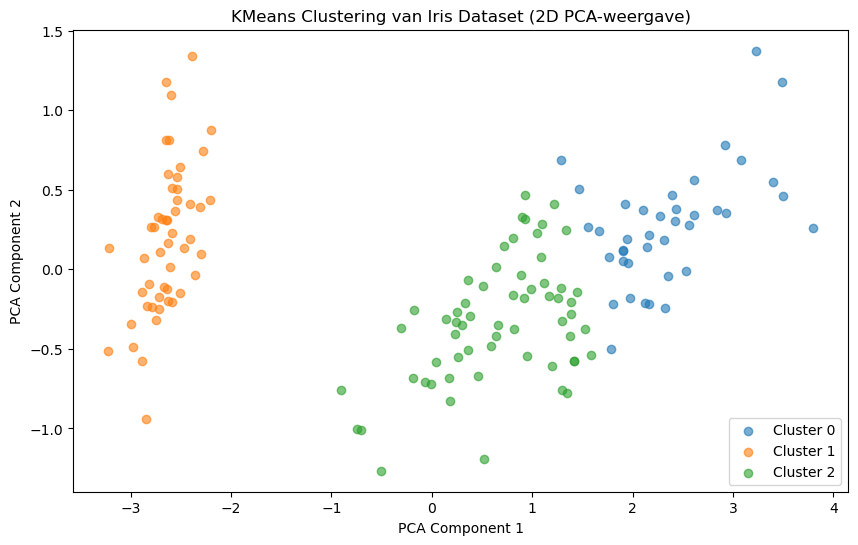

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()

# Inladen van de data
X, y = iris.data, iris.target

# Trainen van het KMeans-clustering model
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters voor de 3 Iris-soorten
kmeans.fit(X)

# Overzicht van voorspelde clusters
clusters = kmeans.labels_

# Reduceer dimensies naar 2D met PCA voor visualisatie
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualiseer de clusters
plt.figure(figsize=(10, 6))

# Plot clusters
for cluster in range(3):
    plt.scatter(X_pca[clusters == cluster, 0], 
                X_pca[clusters == cluster, 1], 
                label=f'Cluster {cluster}', alpha=0.6)

# Voeg labels en titel toe
plt.title("KMeans Clustering van Iris Dataset (2D PCA-weergave)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## 4: Preprocessing
### Opdracht 4a: Data inladen
Laad de "adult" datasets met inkomensgegevens uit de volkstelling, waarbij volwassenen worden ingedeeld in degenen die meer dan $50k per jaar verdienen tegenover degenen die minder verdienen.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# We use display so that we can do multiple nice renderings of dataframes
# in Jupyter
from IPython.display import display

# Exercise 1
data = pd.read_csv("input_files_week_5/adult.csv", index_col=0)
display(data.head())

income = data.income
data_features = data.drop("income", axis=1)

display(data_features.head())

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### Opdracht 4b: Exploratie

Experimenteer met het visualiseren van de gegevens. Kun je ontdekken welke kenmerken het meest van invloed zijn op het inkomen?

<Axes: title={'center': 'By race'}, ylabel='race'>

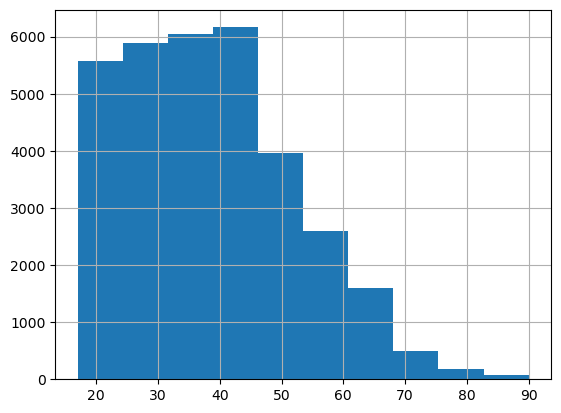

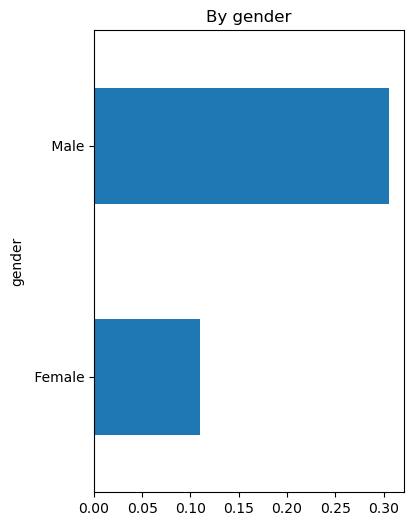

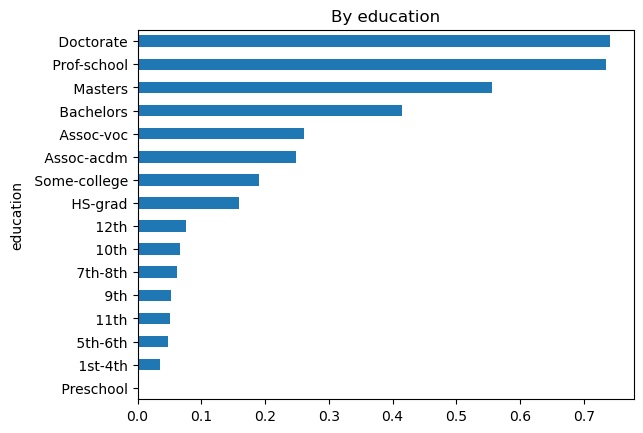

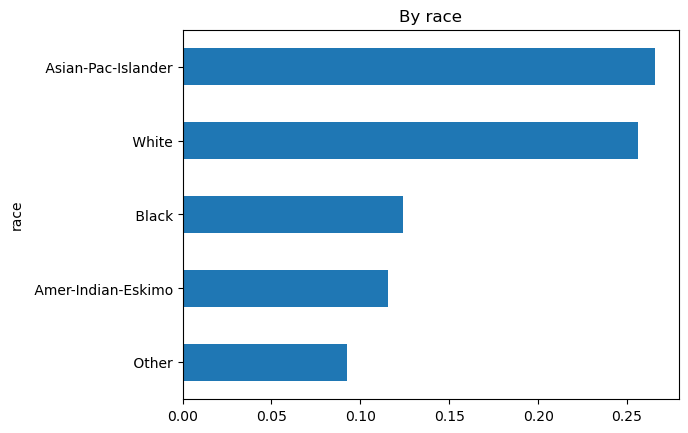

In [5]:
# Exercise 2
data.age.hist()

# plot by gender
data['income_bin'] = data.income == " >50K"
plt.figure(figsize=(4,6))
plt.title("By gender")
grouped = data.groupby("gender")
grouped.income_bin.mean().plot.barh()

# plot by education
plt.figure()
plt.title("By education")
data.groupby("education").income_bin.mean().sort_values().plot.barh()

plt.figure()
plt.title("By race")
data.groupby("race").income_bin.mean().sort_values().plot.barh()

### Opdracht 4c: Encoding

Split de data in een trainings- en testset. Pas dummy encoding en schaling toe. Hoe heeft dit het aantal variabelen veranderd?

In [6]:
# Exercise 3
data_one_hot = pd.get_dummies(data_features)
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(data_features.shape)
print(data_one_hot.shape)

(32561, 13)
(32561, 107)


### Opdracht 4d: Model trainen

Bouw en evalueer een LogisticRegression-model op de data.

In [7]:
# Exercise 4
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_scaled, y_train)
print("Training score:", logreg.score(X_train_scaled, y_train))

X_test_scaled = scaler.transform(X_test)
print("Test score:", logreg.score(X_test_scaled, y_test))
      
print("Faction <= 50k", (y_train.values == " <=50K").mean())

Training score: 0.8411547911547912
Test score: 0.8439995086598698
Faction <= 50k 0.7603194103194103
